# MOTChallenge 2015: Towards a Benchmark for Multi-Target Tracking 

Original paper: https://arxiv.org/pdf/1504.01942.pdf

The authors gathered 22 sequences which are devided into training and test set. The data contains over 10 minutes of footage and 61440 annotated bounding boxs.


In [1]:
%matplotlib inline

import sys
sys.path.insert(0,'../')
from pak import datasets
from pak import utils
import matplotlib.pyplot as plt

root = '/home/julian/Data/pak_test1'

mot15 = datasets.MOT152D(root)
X, Y_det, Y_gt = mot15.get_train_raw("TUD-Stadtmitte")

/home/julian/Data/pak_test1/2DMOT2015 found :)
2DMOT2015 X loaded
2DMOT2015 Y_det loaded
2DMOT2015 Y_gt loaded


### sub-datasets

#### Training:

In [2]:
for f in mot15.get_train_folders():
    print(f)

ADL-Rundle-6
ETH-Bahnhof
ETH-Sunnyday
KITTI-17
TUD-Campus
Venice-2
ADL-Rundle-8
ETH-Pedcross2
KITTI-13
PETS09-S2L1
TUD-Stadtmitte


#### Test:

In [3]:
for f in mot15.get_test_folders():
    print(f)

ADL-Rundle-1
ADL-Rundle-3
AVG-TownCentre
ETH-Jelmoli
KITTI-16
PETS09-S2L2
Venice-1
ETH-Crossing
ETH-Linthescher
KITTI-19
TUD-Crossing


### Y-detection 

| Position  | Name | Description |
| ------------- | ------------- | ---------- |
| 0  | Frame number  | Indicates at which frame the object is present  |
| 2  | Bounding box left  | Coors of top-left corner of pedestrian bb |
| 3  | Bounding box top  | Coors of top-left corner of pedestrian bb |
| 4  | Bounding box width  | Coors of top-left corner of pedestrian bb |
| 5  | Bounding box height  | Coors of top-left corner of pedestrian bb|
| 6  | Confidence score | Indicates how confident the detector is that this instance is a pedestrian |

Positions that are not described yield no function and can be ignored

### Y-ground-truth

| Position  | Name | Description |
| ------------- | ------------- | ---------- |
| 0  | Frame number  | Indicates at which frame the object is present  |
| 1  | Identity number | Each pedestrian trjaectory is identified by a unique ID |
| 2  | Bounding box left  | Coors of top-left corner of pedestrian bb |
| 3  | Bounding box top  | Coors of top-left corner of pedestrian bb |
| 4  | Bounding box width  | Coors of top-left corner of pedestrian bb |
| 5  | Bounding box height  | Coors of top-left corner of pedestrian bb|
| 6  | Confidence score | Flag wheather the entry is to be considered |

In [4]:
print("Y_det:\t",Y_det.shape)
print("Y_gt:\t", Y_gt.shape)

Y_det:	 (1129, 10)
Y_gt:	 (1156, 10)


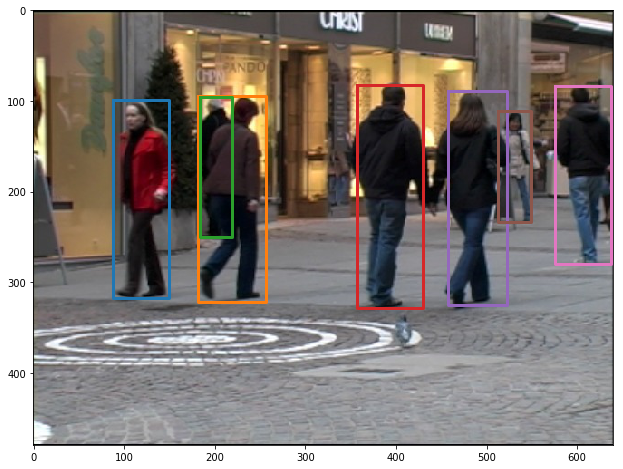

In [5]:
frame = 1

Y_gt_frame1 = utils.extract_eq(Y_gt, col=0, value=frame)
left = Y_gt_frame1[:,2]
top = Y_gt_frame1[:,3]
width = Y_gt_frame1[:,4]
height = Y_gt_frame1[:,5]

img = X[frame]
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(111)
ax.imshow(img)

for x, y, w, h in zip(*[left, top, width, height]):
    bbX, bbY = utils.bb_to_plt_plot(x, y, w, h)
    ax.plot(bbX, bbY, linewidth=3)

plt.show()